# magni.reproducibility example

Copyright (c) 2016, Christian Schou Oxvig, Thomas Arildsen, and Torben Larsen.
Aalborg University, Department of Electronic Systems, Signal and Information
Processing, Fredrik Bajers Vej 7, DK-9220 Aalborg, Denmark.

All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

1. Redistributions of source code must retain the above copyright notice, this
list of conditions and the following disclaimer.

2. Redistributions in binary form must reproduce the the above copyright
notice, this list of conditions and the following disclaimer in the
documentation and/or other materials provided with the distribution.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND
ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED
WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE
DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE
FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL
DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR
SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER
CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY,
OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE
OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.

This notebook shows an example of the use of the `magni.reproduciblity` package 
for aiding in making computational simulations reproducible. The example is
based on a simulation of the Mandelbrot set. All results along with metadata
are stored in an HDF5 database which may be inspected by any appropriate HDF5
viewer, e.g. HDFView, HDFCompass, or ViTables. Here we show how to inspect the
results database using `magni.reproducibility`.

Relevant links:

* Official Magni repository: http://dx.doi.org/10.5278/VBN/MISC/Magni
* Magni documentation: http://magni.readthedocs.io/

In [1]:
%matplotlib inline

import json

from IPython.core.display import HTML
import matplotlib.pyplot as plt
import magni
import numpy as np
from pygments import highlight
from pygments.lexers import PythonLexer
from pygments.formatters import HtmlFormatter
import tables

In [2]:
data_path = 'mandelbrot.hdf5'

## Simulation results

The simulation results are not the important part here. They do visualise nicely, though.

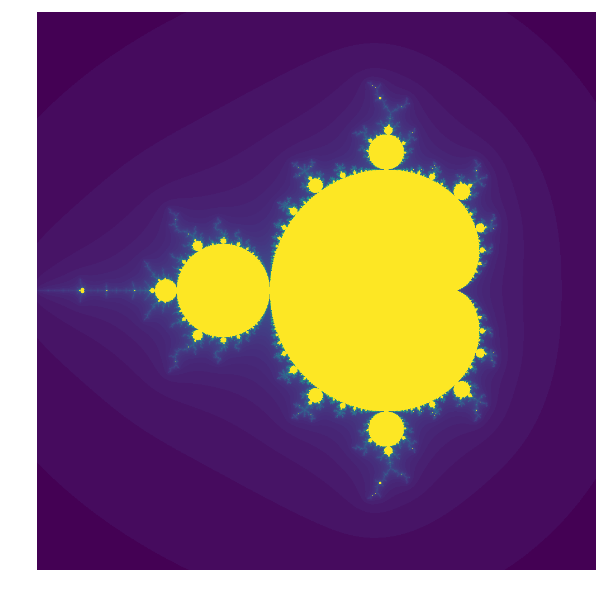

In [3]:
with tables.File(data_path, mode='r') as h5_file:
    mandelbrot_set = h5_file.root.simulation_result.mandelbrot.read()

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.imshow(np.log(mandelbrot_set), cmap='viridis')
_ = ax.axis('off')

## Metadata stored along with simulation results

More importantly, the results are stored along with a lot of metadata which may aid reproducing the result as well as document how the results were obtained. The metadata is divided into annotations and chases. Here we show how to inspect a subset of these annotations and chases using `magni` and Python.

### An overview all annotations and chases

In [4]:
with tables.File(data_path, mode='r') as h5_file:
    annotations = magni.reproducibility.io.read_annotations(h5_file)
    chases = magni.reproducibility.io.read_chases(h5_file)
    
print('Annotations: {}'.format(sorted(annotations.keys())))
print('Chases: {}'.format(sorted(chases.keys())))

Annotations: ['conda_info', 'custom_annotations', 'datetime', 'end_time', 'git_revision', 'magni_config', 'magni_info', 'platform_info']
Chases: ['main_file_name', 'main_file_source', 'main_source', 'stack_trace']


### The datatime annotation

In [5]:
annotations['datetime']

{'pretty_utc': 'Mon May 23 06:48:12 2016',
 'status': 'Succeeded',
 'today': 'datetime.datetime(2016, 5, 23, 8, 48, 12, 269577)',
 'utcnow': 'datetime.datetime(2016, 5, 23, 6, 48, 12, 269613)'}

### The GIT revision annotation

In [6]:
annotations['git_revision']

{'branch': 'heads/magni_1.5.0',
 'remote': 'origin\tgit@github.com:SIP-AAU/FastAFM.git (fetch)\norigin\tgit@github.com:SIP-AAU/FastAFM.git (push)',
 'status': 'Succeeded',
 'tag': 'v1.4.0-66-g2642286'}

### The platform info annotation

In [7]:
annotations['platform_info']

{'libc': '["glibc", "2.2.5"]',
 'linux': '["debian", "jessie/sid", ""]',
 'mac_os': '["", ["", "", ""], ""]',
 'machine': '"x86_64"',
 'node': '"eagle1"',
 'processor': '"x86_64"',
 'python': '"3.5.1"',
 'release': '"3.16.0-46-generic"',
 'status': 'All OK',
 'system': '"Linux"',
 'version': '"#62~14.04.1-Ubuntu SMP Tue Aug 11 16:27:16 UTC 2015"',
 'win32': '["", "", "", ""]'}

### The Conda environment used in the simulation

* This is very experimental
* Basically the output of `conda env export`

In [8]:
json.loads(annotations['conda_info']['env_export'])

{'dependencies': ['_license=1.1=py35_1',
  'abstract-rendering=0.5.1=np110py35_0',
  'accelerate=2.0.1=np110py35_p0',
  'accelerate_cudalib=2.0=0',
  'alabaster=0.7.6=py35_0',
  'anaconda=2.4.1=np110py35_0',
  'anaconda-client=1.2.1=py35_0',
  'argcomplete=1.0.0=py35_1',
  'astropy=1.0.6=np110py35_0',
  'babel=2.1.1=py35_0',
  'beautifulsoup4=4.4.1=py35_0',
  'bitarray=0.8.1=py35_0',
  'blaze-core=0.8.3=py35_0',
  'bokeh=0.10.0=py35_0',
  'boto=2.38.0=py35_0',
  'bottleneck=1.0.0=np110py35_0',
  'cffi=1.2.1=py35_0',
  'clyent=1.2.0=py35_0',
  'colorama=0.3.3=py35_0',
  'conda=3.19.0=py35_0',
  'conda-env=2.4.5=py35_0',
  'configobj=5.0.6=py35_0',
  'cryptography=1.0.2=py35_0',
  'cudatoolkit=7.0=1',
  'curl=7.45.0=0',
  'cvxopt=1.1.8=py35_0',
  'cycler=0.9.0=py35_0',
  'cython=0.23.4=py35_0',
  'cytoolz=0.7.4=py35_0',
  'datashape=0.4.7=np110py35_1',
  'decorator=4.0.4=py35_0',
  'docutils=0.12=py35_0',
  'dynd-python=0.7.0=py35_0',
  'fastcache=1.0.2=py35_0',
  'flask=0.10.1=py35_1',


### The path to the script which was used to run the simulation

In [9]:
chases['main_file_name']

'/user/cso/experiments/scipy2016/magni_reproducibility_example.py'

### Custom annotations related to the script which was used to run the simulation

In [10]:
annotations['custom_annotations']

{'script_checksums': {'md5sum': 'a8fdad6e827ea19106c96ec8dca91c81',
  'sha256sum': 'ed44671c6645c6564d9e7818f28c820b8d7515a6651579c48529f00b6d008351'},
 'script_input_parameters': {'im_max': 1.5,
  'im_min': -1.5,
  'num_points': 1000,
  're_max': 1.0,
  're_min': -2.0}}

### The content of the script which was used to run the simulation

In [11]:
main_file_source = chases['main_file_source']
html_main_file_source = highlight(main_file_source, PythonLexer(), HtmlFormatter(full=True))
HTML(html_main_file_source)